In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
with open("../datasets/wine/wine_train.json") as json_data:
    dataset = json.load(json_data)

X = np.asarray(dataset["attribs"])
y = np.asarray(dataset["target_hot"])
n_inputs = len(X[0]) 
n_outputs = len(y[0]) 
print(n_inputs)
print(n_outputs)
hidden_layer_neurons = 13


13
3


0.029334317843223757


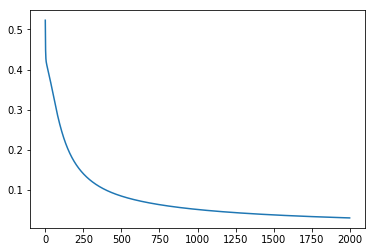

In [26]:
w1 = 2*np.random.random((n_inputs, hidden_layer_neurons)) - 1
wo = 2*np.random.random((hidden_layer_neurons,n_outputs)) - 1
b1 = 2*np.random.random((hidden_layer_neurons)) - 1
b2 = 2*np.random.random((n_outputs)) - 1

ers=[]
for _ in range (2000):
    l1 = 1/(1 + np.exp(-(np.dot(X,w1)+b1)))
    ot = 1/(1 + np.exp(-(np.dot(l1,wo)+b2)))
    d_o1 = (y - ot)*(ot * (1-ot))
    d_l1 = np.dot(d_o1,wo.T) * (l1*(1-l1))
    wo += np.dot(l1.T,d_o1) * 0.01
    b2 += np.sum(d_o1, axis = 0) *0.01
    w1 += np.dot(X.T,d_l1) * 0.01
    b1 += np.sum(d_l1, axis = 0) *0.01
    ers.append((abs(y-ot)).mean())
print(ers[-1])
plt.plot(ers)

In [27]:
with open("../datasets/wine/wine_test.json") as json_data:
    dataset = json.load(json_data)

X_test = np.asarray(dataset["attribs"])
y_test = np.asarray(dataset["target_hot"])

In [28]:
l1 = 1/(1 + np.exp(-(np.dot(X_test,w1)+b1)))
ot = 1/(1 + np.exp(-(np.dot(l1,wo)+b2)))
print(((abs(y_test-ot)).mean()))
y_pred = np.argmax(ot,axis=1)
y_true = np.argmax(y_test, axis=1)
print(y_true==y_pred)

0.05210835502005779
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [29]:
w1

array([[ 0.59033637, -0.99658033,  2.1058619 ,  0.00523377, -1.11280672,
        -1.26334521, -0.02749259, -0.74682529,  0.13358962, -1.13524077,
        -0.09093054, -0.52853801,  2.27755371],
       [-0.64021979,  0.56950135,  0.38895109, -0.46108081,  0.30996207,
        -0.06727335,  1.43925832, -0.26580728, -0.78100664, -0.84625923,
        -1.07441297, -1.16207066,  1.4533879 ],
       [ 0.92913181,  0.33022592,  1.8301767 ,  1.00426858, -1.00644122,
        -0.2840697 ,  0.67222361,  0.88694178, -0.74551849, -2.35213369,
        -0.39463816, -0.47780664,  2.70586683],
       [-1.36317583, -0.0754584 , -1.76843831, -0.9574656 , -0.30292322,
         2.38799536,  1.70642135,  0.56093726,  0.57084871,  0.37716288,
         0.27806969,  0.42984185, -1.44128573],
       [-0.1364181 , -0.65938481, -0.10149755, -0.30835626,  0.28278868,
         0.35549305,  0.21507893,  0.43562794, -0.80928596, -0.35208985,
        -0.81322067,  0.15069337,  0.57749595],
       [-0.56812448,  0.686477

In [30]:
wo

array([[ 2.04346505, -1.53420439, -2.16375411],
       [-0.19094174,  1.55947601, -0.22588634],
       [ 3.23067591, -2.97779848,  0.57929159],
       [ 0.06030084, -0.34995449, -2.23881624],
       [-1.48713363,  0.94542554,  0.29194468],
       [-3.84733826,  1.83463582,  1.49446085],
       [-3.45379216, -3.06653575,  3.95934635],
       [-2.12642137, -0.60000805,  1.60907807],
       [-1.79692729,  1.43297414,  0.74616619],
       [-2.41916267,  2.90636883, -1.6518243 ],
       [ 0.3646511 ,  0.55767668, -2.74481314],
       [-1.84992108,  2.52290088, -0.71235147],
       [ 3.3309762 , -5.94605203,  3.26459195]])

In [31]:
b1

array([-0.95359275, -0.50865558, -1.26767131, -0.26937253, -0.02750119,
        2.25183178, -1.00689256,  0.24123896,  0.3658249 ,  1.3047948 ,
       -0.33289974,  0.58619817, -2.73371217])

In [32]:
b2

array([-0.444496  ,  1.63442238, -2.05987337])